In [247]:
import importlib

import myutils
importlib.reload(myutils)

import classifier
importlib.reload(classifier)

<module 'classifier' from 'c:\\Users\\dzuy\\Desktop\\CPSC322-Final-Project\\classifier.py'>

# **Asthma Diagnosis**

### *Team members: Lauren Chin and Lauren Nguyen*

## Dataset

* Source: [Asthma Dataset](https://www.kaggle.com/datasets/rabieelkharoua/asthma-disease-dataset) 
* Format: CSV File
* Contents: This data set contains the patient information for those who are diagnosed with Asthma. Asthma is a chronic lung disease that causes inflamation and tightening of the airways, often making it hard to breath. This dataset contains 2,392 different patients that involve their medical history, symptoms, allergies, and much more.
* Attributes:
    * `PatientID` - a unique identifier for each patient
    * `Age` - age of patient
    * `Gender` - 0 for male and 1 for female
    * `Ethnicity` - encoded as:
        * 0: Caucasian
        * 1: African American
        * 2: Asian
        * 3: Other
    * `EducationLevel` - encoded as:
        * 0: None
        * 1: High School
        * 2: Bachelors
        * 3: Higher
    * `BMI` - body mass index, ranges from 15-40
    * `Smoking` - 0 for no and 1 for yes
    * `PhysicalActivity` - weekly physical activity(hours), ranges 0-10
    * `DietQuality` - ranges from 0-10
    * `SleepQuality` - ranges from 4-10
    * `PollutionExposure` - scored from 0-10
    * `PollenExposure` - scored from 0-10
    * `DustExposure` - scored from 0-10
    * `LungFunctionFEV1` - Forced Expiratory Volume in 1 second (FEV1), ranging from 1.0 to 4.0 liters.
    * `LungFunctionFVC` - Forced Vital Capacity (FVC), ranging from 1.5 to 6.0 liters.
    * `PetAllergy`
    * `FamilyHistoryAsthma` 
    * `HistoryOfAllergies`
    * `Eczema` 
    * `HayFever` 
    * `GastroesophagealReflux`
    * `Wheezing`
    * `Coughing`
    * `ChestTightness`
    * `ShortnessOfBreath`
    * `NighttimeSymptoms`
    * `ExerciseInduced`
    * `DoctorInCharge` - doctor in charge, confidential for all instances
    * **`Diagnosis`** - diagnosis status for asthma patient. 0 for no and 1 for yes

    
    

## Implementation/Technical Merit

### Anticipated Challenges
* Pre-processing:
    * Because there are so many attributes, deciding to use a subset of them or all of them
        * To pare down the attributes, we could randomly select different subsets and compare the model performances to select the "best" attributes
        * However, we instead will likely use unsupervised learning to graph the attributes in comparison to the classifier attribute and determine which attributes have the strongest correlations and use those
    * Discretizing our dataset could be a challenge because there are many attributes with float values that are quite specific (lots of decimal places)
        * For example some of these attributes are: PhysicalActivity (0-10, but float long decimals), DietQuality (0-10, but float long decimals), SleepQuality (4-10, but float long decimals), and others

* Classification: 
    * Because there are so many attributes, making sure that we don't overfit our model
    

## Potential Impact of Results

* Why these results are useful:
    * We are looking at the asthma dataset with the goal of creating classifiers to predict if someone has asthma or not
    * These results are useful because it can help with medical diagnosis
    * While asthma isn't as life threatening as a disease like cancer, detection is still important so measures can be taken to help ease symptoms for patients

* Stakeholders:
    * Doctors (people who have to make the medical diagnosis)
    * Patients (people who could potentially have asthma)


# Loading Data

In [248]:
table = myutils.load('asthma_disease_data.csv')

headers = table.pop(0)

# Cleaning

1. Removing unnecessary features
    * `EducationLevel`
    * `DoctorInCharge`

In [249]:
#table, headers = utils.remove_cols(table, headers, ['EducationLevel', 'DoctorInCharge'])

yes = []
no = []

for i in range(len(table)):
    if table[i][-1] == "1":
        yes.append(table[i])
    else:
        no.append(table[i])
    
myutils.randomize_in_place(no)
table = yes + no[:900]

myutils.randomize_in_place(table)

# Exploratory Data Analysis (EDA)

## Data Visualization
1. Distribution of Diagnosis

2. Visualizations for the following attributes:
    * Age vs. Diagnosis
    * Gender vs. Diagnosis
    * Ethnicity vs. Diagnosis
    * BMI vs. Diagnosis
    * Smoking vs. Diagnosis
    * PhysicalActivity vs. Diagnosis
    * PollutionExposure vs. Diagnosis
    * LungFunctionFEV1 vs. Diagnosis
    * LungFunctionFVC vs. Diagnosis

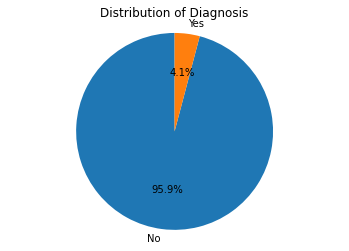

In [250]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats

importlib.reload(myutils)
np.random.seed(0)

# Diagnosis Distribution
y = [int(val) for val in myutils.get_column(table, headers, "Diagnosis")]

# Calculate the counts of 0's and 1's
counts = [y.count(0), y.count(1)]

# Pie chart function
def pie_chart(labels, sizes, title):
    plt.figure()
    plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
    plt.axis("equal")  # Equal aspect ratio so pie is drawn as circle
    plt.title(title)
    plt.show()

# Call the function with labels (0 and 1) and their corresponding counts
pie_chart(["No", "Yes"], counts, "Distribution of Diagnosis")

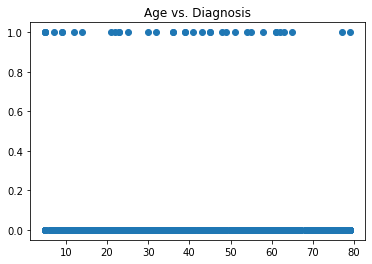

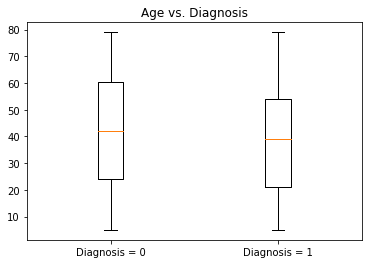

In [251]:
# Age vs Diagnosis
x = [int(val) for val in myutils.get_column(table, headers, "Age")]

# Scatter Plot
plt.scatter(x,y)
plt.title("Age vs. Diagnosis")

# Box Plots
# Splitting age based on diagnosis
age_diagnosis_0 = [age for age, diag in zip(x, y) if diag == 0]
age_diagnosis_1 = [age for age, diag in zip(x, y) if diag == 1]

# Box plot function
def box_plot(distributions, labels, title):
    plt.figure()
    plt.boxplot(distributions, labels=labels)
    plt.title(title)
    plt.show()

# Calling the box plot function with the data
box_plot([age_diagnosis_0, age_diagnosis_1], ["Diagnosis = 0", "Diagnosis = 1"], "Age vs. Diagnosis")

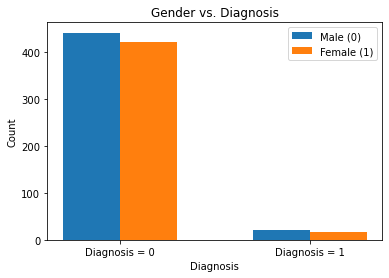

In [252]:
# Gender vs Diagnosis
x = [int(val) for val in myutils.get_column(table, headers, "Gender")]

# Counting the number of males (Gender = 0) and females (Gender = 1) for each Diagnosis category
gender_counts_0 = [sum(1 for gender, diag in zip(x, y) if gender == 0 and diag == 0),  # Male (Gender = 0) and Diagnosis = 0
                   sum(1 for gender, diag in zip(x, y) if gender == 0 and diag == 1)]  # Male (Gender = 0) and Diagnosis = 1

gender_counts_1 = [sum(1 for gender, diag in zip(x, y) if gender == 1 and diag == 0),  # Female (Gender = 1) and Diagnosis = 0
                   sum(1 for gender, diag in zip(x, y) if gender == 1 and diag == 1)]  # Female (Gender = 1) and Diagnosis = 1

# Bar chart function
def bar_chart(x, y, title):
    plt.figure()
    width = 0.3  # Width of bars
    index = np.arange(len(x))  # Positions of bars
    
    # Plotting bars for males and females
    plt.bar(index - width/2, y[0], width, label="Male (0)")  # Bars for males
    plt.bar(index + width/2, y[1], width, label="Female (1)")  # Bars for females
    
    # Adding labels, title, and legend
    plt.xlabel('Diagnosis')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(index, x)  # Set x-axis labels to 'Diagnosis = 0' and 'Diagnosis = 1'
    plt.legend()
    
    plt.show()

# Labels and counts for bar chart
labels = ['Diagnosis = 0', 'Diagnosis = 1']
# Counts for males and females in a tuple (male counts, female counts)
counts = [gender_counts_0, gender_counts_1]

# Calling the bar chart function with the data
bar_chart(labels, counts, "Gender vs. Diagnosis")

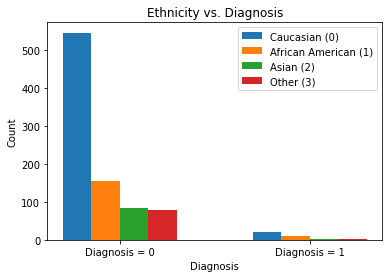

In [253]:
# Ethnicity vs Diagnosis
x = [int(val) for val in myutils.get_column(table, headers, "Ethnicity")]

# Counting the number of individuals in each ethnicity group (0: Caucasian, 1: African American, 2: Asian, 3: Other) for each Diagnosis category
ethnicity_counts_0 = [
    sum(1 for ethnicity, diag in zip(x, y) if ethnicity == 0 and diag == 0),  # Caucasian (Ethnicity = 0) and Diagnosis = 0
    sum(1 for ethnicity, diag in zip(x, y) if ethnicity == 0 and diag == 1)   # Caucasian (Ethnicity = 0) and Diagnosis = 1
]

ethnicity_counts_1 = [
    sum(1 for ethnicity, diag in zip(x, y) if ethnicity == 1 and diag == 0),  # African American (Ethnicity = 1) and Diagnosis = 0
    sum(1 for ethnicity, diag in zip(x, y) if ethnicity == 1 and diag == 1)   # African American (Ethnicity = 1) and Diagnosis = 1
]

ethnicity_counts_2 = [
    sum(1 for ethnicity, diag in zip(x, y) if ethnicity == 2 and diag == 0),  # Asian (Ethnicity = 2) and Diagnosis = 0
    sum(1 for ethnicity, diag in zip(x, y) if ethnicity == 2 and diag == 1)   # Asian (Ethnicity = 2) and Diagnosis = 1
]

ethnicity_counts_3 = [
    sum(1 for ethnicity, diag in zip(x, y) if ethnicity == 3 and diag == 0),  # Other (Ethnicity = 3) and Diagnosis = 0
    sum(1 for ethnicity, diag in zip(x, y) if ethnicity == 3 and diag == 1)   # Other (Ethnicity = 3) and Diagnosis = 1
]

# Bar chart function
def bar_chart(x, y, title):
    plt.figure()
    width = 0.15  # Width of bars
    index = np.arange(len(x))  # Positions of bars
    
    # Plotting bars for each ethnicity
    plt.bar(index - 1.5 * width, y[0], width, label="Caucasian (0)")  # Bars for Caucasian
    plt.bar(index - 0.5 * width, y[1], width, label="African American (1)")  # Bars for African American
    plt.bar(index + 0.5 * width, y[2], width, label="Asian (2)")  # Bars for Asian
    plt.bar(index + 1.5 * width, y[3], width, label="Other (3)")  # Bars for Other
    
    # Adding labels, title, and legend
    plt.xlabel('Diagnosis')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(index, x)  # Set x-axis labels to 'Diagnosis = 0' and 'Diagnosis = 1'
    plt.legend()
    
    plt.show()

# Labels and counts for bar chart
labels = ['Diagnosis = 0', 'Diagnosis = 1']
# Counts for each ethnicity group in a tuple (Caucasian counts, African American counts, Asian counts, Other counts)
counts = [ethnicity_counts_0, ethnicity_counts_1, ethnicity_counts_2, ethnicity_counts_3]

# Calling the bar chart function with the data
bar_chart(labels, counts, "Ethnicity vs. Diagnosis")


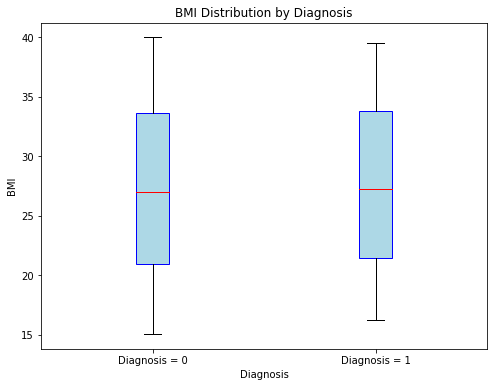

In [254]:
# BMI vs Diagnosis
bmi_values = [float(val) for val in myutils.get_column(table, headers, "BMI")]
# Assuming diagnosis values (0 or 1) are in another column
diagnosis_values = [int(val) for val in myutils.get_column(table, headers, "Diagnosis")]

# Creating two lists for the BMI values for each diagnosis category
bmi_diagnosis_0 = [bmi for bmi, diag in zip(bmi_values, diagnosis_values) if diag == 0]
bmi_diagnosis_1 = [bmi for bmi, diag in zip(bmi_values, diagnosis_values) if diag == 1]

# Plotting box plot
def box_plot(bmi_diagnosis_0, bmi_diagnosis_1, title):
    plt.figure(figsize=(8, 6))
    
    # Data for the box plot: one box for Diagnosis = 0 and one for Diagnosis = 1
    data = [bmi_diagnosis_0, bmi_diagnosis_1]
    
    # Creating the box plot
    plt.boxplot(data, vert=True, patch_artist=True, 
                labels=['Diagnosis = 0', 'Diagnosis = 1'], 
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red'))
    
    # Adding labels and title
    plt.xlabel('Diagnosis')
    plt.ylabel('BMI')
    plt.title(title)
    
    plt.show()

# Calling the box plot function with the data
box_plot(bmi_diagnosis_0, bmi_diagnosis_1, "BMI Distribution by Diagnosis")


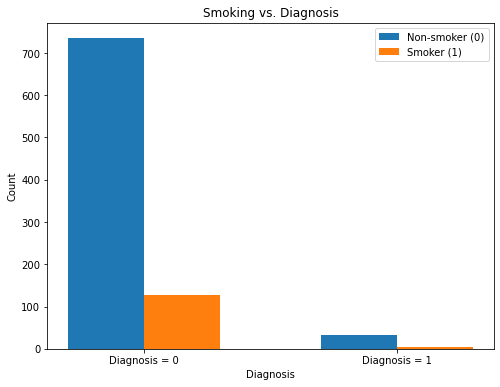

In [255]:
# Smoking vs Diagnosis
smoking_values = [int(val) for val in myutils.get_column(table, headers, "Smoking")]
# Assuming diagnosis values (0 or 1) are in another column
diagnosis_values = [int(val) for val in myutils.get_column(table, headers, "Diagnosis")]

# Counting the number of smokers (Smoking = 1) and non-smokers (Smoking = 0) for each Diagnosis category
smoking_counts_0 = [
    sum(1 for smoking, diag in zip(smoking_values, diagnosis_values) if smoking == 0 and diag == 0),  # Non-smokers (Smoking = 0) and Diagnosis = 0
    sum(1 for smoking, diag in zip(smoking_values, diagnosis_values) if smoking == 0 and diag == 1)   # Non-smokers (Smoking = 0) and Diagnosis = 1
]

smoking_counts_1 = [
    sum(1 for smoking, diag in zip(smoking_values, diagnosis_values) if smoking == 1 and diag == 0),  # Smokers (Smoking = 1) and Diagnosis = 0
    sum(1 for smoking, diag in zip(smoking_values, diagnosis_values) if smoking == 1 and diag == 1)   # Smokers (Smoking = 1) and Diagnosis = 1
]

# Bar chart function
def bar_chart(x, y, title):
    plt.figure(figsize=(8, 6))
    width = 0.3  # Width of bars
    index = np.arange(len(x))  # Positions of bars
    
    # Plotting bars for non-smokers and smokers
    plt.bar(index - width/2, y[0], width, label="Non-smoker (0)")  # Bars for non-smokers
    plt.bar(index + width/2, y[1], width, label="Smoker (1)")  # Bars for smokers
    
    # Adding labels, title, and legend
    plt.xlabel('Diagnosis')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(index, x)  # Set x-axis labels to 'Diagnosis = 0' and 'Diagnosis = 1'
    plt.legend()
    
    plt.show()

# Labels and counts for bar chart
labels = ['Diagnosis = 0', 'Diagnosis = 1']
# Counts for non-smokers and smokers in a tuple (non-smoker counts, smoker counts)
counts = [smoking_counts_0, smoking_counts_1]

# Calling the bar chart function with the data
bar_chart(labels, counts, "Smoking vs. Diagnosis")


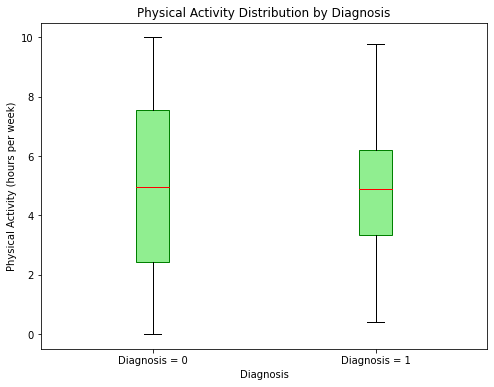

In [256]:
# PhysicalActivity vs Diagnosis
physical_activity_values = [float(val) for val in myutils.get_column(table, headers, "PhysicalActivity")]
# Assuming diagnosis values (0 or 1) are in another column
diagnosis_values = [int(val) for val in myutils.get_column(table, headers, "Diagnosis")]

# Creating two lists for the physical activity values for each diagnosis category
activity_diagnosis_0 = [activity for activity, diag in zip(physical_activity_values, diagnosis_values) if diag == 0]
activity_diagnosis_1 = [activity for activity, diag in zip(physical_activity_values, diagnosis_values) if diag == 1]

# Plotting box plot
def box_plot(activity_diagnosis_0, activity_diagnosis_1, title):
    plt.figure(figsize=(8, 6))
    
    # Data for the box plot: one box for Diagnosis = 0 and one for Diagnosis = 1
    data = [activity_diagnosis_0, activity_diagnosis_1]
    
    # Creating the box plot
    plt.boxplot(data, vert=True, patch_artist=True, 
                labels=['Diagnosis = 0', 'Diagnosis = 1'], 
                boxprops=dict(facecolor='lightgreen', color='green'),
                medianprops=dict(color='red'))
    
    # Adding labels and title
    plt.xlabel('Diagnosis')
    plt.ylabel('Physical Activity (hours per week)')
    plt.title(title)
    
    plt.show()

# Calling the box plot function with the data
box_plot(activity_diagnosis_0, activity_diagnosis_1, "Physical Activity Distribution by Diagnosis")


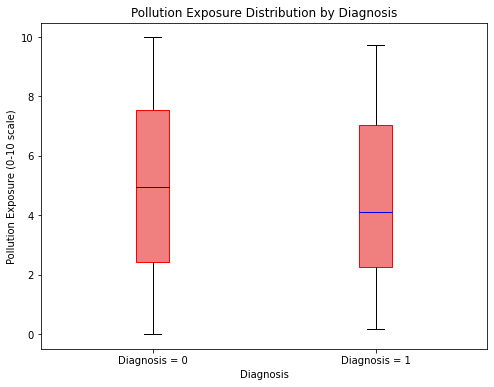

In [257]:
# PollutionExposure vs Diagnosis
pollution_values = [float(val) for val in myutils.get_column(table, headers, "PollutionExposure")]
# Assuming diagnosis values (0 or 1) are in another column
diagnosis_values = [int(val) for val in myutils.get_column(table, headers, "Diagnosis")]

# Creating two lists for the pollution exposure values for each diagnosis category
pollution_diagnosis_0 = [pollution for pollution, diag in zip(pollution_values, diagnosis_values) if diag == 0]
pollution_diagnosis_1 = [pollution for pollution, diag in zip(pollution_values, diagnosis_values) if diag == 1]

# Plotting box plot
def box_plot(pollution_diagnosis_0, pollution_diagnosis_1, title):
    plt.figure(figsize=(8, 6))
    
    # Data for the box plot: one box for Diagnosis = 0 and one for Diagnosis = 1
    data = [pollution_diagnosis_0, pollution_diagnosis_1]
    
    # Creating the box plot
    plt.boxplot(data, vert=True, patch_artist=True, 
                labels=['Diagnosis = 0', 'Diagnosis = 1'], 
                boxprops=dict(facecolor='lightcoral', color='red'),
                medianprops=dict(color='blue'))
    
    # Adding labels and title
    plt.xlabel('Diagnosis')
    plt.ylabel('Pollution Exposure (0-10 scale)')
    plt.title(title)
    
    plt.show()

# Calling the box plot function with the data
box_plot(pollution_diagnosis_0, pollution_diagnosis_1, "Pollution Exposure Distribution by Diagnosis")


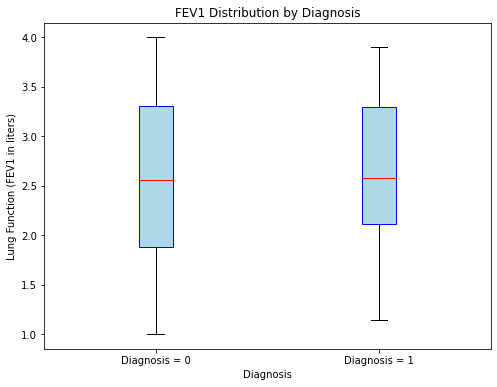

In [258]:
# LungFunctionFEV1 vs Diagnosis
fev1_values = [float(val) for val in myutils.get_column(table, headers, "LungFunctionFEV1")]
# Assuming diagnosis values (0 or 1) are in another column
diagnosis_values = [int(val) for val in myutils.get_column(table, headers, "Diagnosis")]

# Creating two lists for the FEV1 values for each diagnosis category
fev1_diagnosis_0 = [fev1 for fev1, diag in zip(fev1_values, diagnosis_values) if diag == 0]
fev1_diagnosis_1 = [fev1 for fev1, diag in zip(fev1_values, diagnosis_values) if diag == 1]

# Plotting box plot
def box_plot(fev1_diagnosis_0, fev1_diagnosis_1, title):
    plt.figure(figsize=(8, 6))
    
    # Data for the box plot: one box for Diagnosis = 0 and one for Diagnosis = 1
    data = [fev1_diagnosis_0, fev1_diagnosis_1]
    
    # Creating the box plot
    plt.boxplot(data, vert=True, patch_artist=True, 
                labels=['Diagnosis = 0', 'Diagnosis = 1'], 
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red'))
    
    # Adding labels and title
    plt.xlabel('Diagnosis')
    plt.ylabel('Lung Function (FEV1 in liters)')
    plt.title(title)
    
    plt.show()

# Calling the box plot function with the data
box_plot(fev1_diagnosis_0, fev1_diagnosis_1, "FEV1 Distribution by Diagnosis")


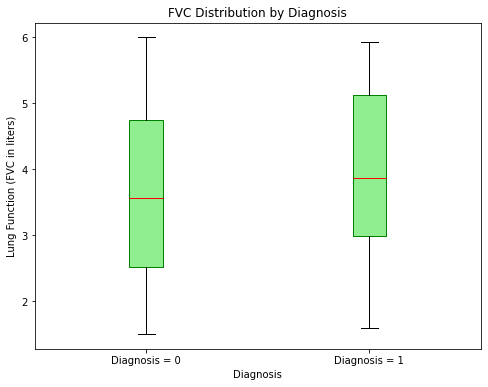

In [259]:
# LungFunctionFVC vs Diagnosis
fvc_values = [float(val) for val in myutils.get_column(table, headers, "LungFunctionFVC")]
# Assuming diagnosis values (0 or 1) are in another column
diagnosis_values = [int(val) for val in myutils.get_column(table, headers, "Diagnosis")]

# Creating two lists for the FVC values for each diagnosis category
fvc_diagnosis_0 = [fvc for fvc, diag in zip(fvc_values, diagnosis_values) if diag == 0]
fvc_diagnosis_1 = [fvc for fvc, diag in zip(fvc_values, diagnosis_values) if diag == 1]

# Plotting box plot
def box_plot(fvc_diagnosis_0, fvc_diagnosis_1, title):
    plt.figure(figsize=(8, 6))
    
    # Data for the box plot: one box for Diagnosis = 0 and one for Diagnosis = 1
    data = [fvc_diagnosis_0, fvc_diagnosis_1]
    
    # Creating the box plot
    plt.boxplot(data, vert=True, patch_artist=True, 
                labels=['Diagnosis = 0', 'Diagnosis = 1'], 
                boxprops=dict(facecolor='lightgreen', color='green'),
                medianprops=dict(color='red'))
    
    # Adding labels and title
    plt.xlabel('Diagnosis')
    plt.ylabel('Lung Function (FVC in liters)')
    plt.title(title)
    
    plt.show()

# Calling the box plot function with the data
box_plot(fvc_diagnosis_0, fvc_diagnosis_1, "FVC Distribution by Diagnosis")


## Data Classification
* KNN classifier


In [260]:
# some useful mysklearn package import statements and reloads
import importlib

import myutils
importlib.reload(myutils)
import myutils as myutils

# uncomment once you paste your mypytable.py into mysklearn package
import mypytable as mypytable
importlib.reload(mypytable)
from mypytable import MyPyTable 

# uncomment once you paste your myclassifiers.py into mysklearn package
import classifier as myclassifiers
importlib.reload(myclassifiers)
from classifier import MyKNeighborsClassifier, MyNaiveBayesClassifier

import myevaluation
importlib.reload(myevaluation)
import myevaluation as myevaluation

from tabulate import tabulate


In [261]:
import numpy as np

def preprocess_data(data: MyPyTable):
    """Convert categorical columns in the data to numeric values."""
    # List of categorical columns that need encoding
    categorical_columns = ['Gender', 'Ethnicity', 'EducationLevel', 'Diagnosis']
    
    # Encode categorical columns to numeric values
    for col in categorical_columns:
        column_data = data.get_column(col)
        unique_values = list(set(column_data))  # Get unique values
        
        # Create a mapping of unique values to integers
        value_to_int = {value: idx for idx, value in enumerate(unique_values)}
        
        # Replace categorical values with their numeric representation
        encoded_column = [value_to_int[value] for value in column_data]
        
        # Update the column with the encoded values
        data.update_column(col, encoded_column)
        
    return data


In [262]:
# creating a MyPyTable object and loading from file
print("\nLoading data from asthma_disease_data.csv file")
asthma_data = mypytable.MyPyTable()
asthma_data.load_from_file("asthma_disease_data.csv")
asthma_data.data = [row[:-1] for row in table]  # Removes last column from every row
asthma_data.column_names = headers[:-1]

# Preprocess data before using it in kNN
asthma_data = preprocess_data(asthma_data)

def cross_val_predict_extended_knn(data: MyPyTable, n_splits: int = 10):
    """ This function computes the predictive
    accuracy and error rate for knn
    using k-fold cross validation. It takes in MyPyTable
    with data filled in, and value of splits.
    Then prints out info nicely. 
    This function is now extended to calculate
    precision, recall, f1 score.
    
    Args:
        data (MyPyTable): MyPyTable object with data filled in
        n_splits(int): k number of splits
    """
    accuracy_results = []
    error_rate_results = []
    precision_results = []
    recall_results = []
    f1_results = []

    confusion_matricies = []
    
    # Extract features and target variable as lists
    bmi = list(map(float, data.get_column('BMI')))  # Convert BMI to float
    smoking = [1 if x == 'yes' else 0 for x in data.get_column('Smoking')]  # Encode Smoking
    physical_activity = [1 if x == 'yes' else 0 for x in data.get_column('PhysicalActivity')]  # Encode PhysicalActivity
    lung_function = list(map(float, data.get_column('LungFunctionFEV1')))  # Convert LungFunction to float
    target = data.get_column('Diagnosis')  # Diagnosis is assumed to be numeric

    # Combine features into a single list of features
    features = list(zip(bmi, smoking, physical_activity, lung_function))  # Now each entry is numeric

    # Generate k-fold splits
    folds = myevaluation.kfold_split(features, n_splits=n_splits)

    for train_indices, test_indices in folds:
        X_train = [features[i] for i in train_indices]  # Use combined features
        y_train = [target[i] for i in train_indices]  # Use target
        X_test = [features[i] for i in test_indices]  # Use combined features
        y_test = [target[i] for i in test_indices]  # Use target

        # Skip if the test set is empty
        if len(y_test) == 0:
            continue

        # Initialize and train kNN classifier with the categorical flag
        knn = myclassifiers.MyKNeighborsClassifier()
        knn.fit(X_train, y_train)

        # Get predictions for the test set
        knn_predictions = knn.predict(X_test)
        knn_accuracy = myevaluation.accuracy_score(y_test, knn_predictions)
        knn_error_rate = 1 - knn_accuracy
        knn_precision = myevaluation.binary_precision_score(y_test, knn_predictions)
        knn_recall = myevaluation.binary_recall_score(y_test, knn_predictions)
        knn_f1 = myevaluation.binary_f1_score(y_test, knn_predictions)

        # Log the results
        accuracy_results.append(knn_accuracy)
        error_rate_results.append(knn_error_rate)
        precision_results.append(knn_precision)
        recall_results.append(knn_recall)
        f1_results.append(knn_f1)

        # Create and append confusion matrix
        confusion_matrix = myevaluation.confusion_matrix(y_test, knn_predictions, ["yes", "no"])
        confusion_matricies.append(confusion_matrix)

    # Calculate average accuracy and error rate
    avg_knn_accuracy = sum(result for result in accuracy_results) / n_splits if accuracy_results else 0
    avg_knn_error_rate = sum(result for result in error_rate_results) / n_splits if error_rate_results else 0
    avg_knn_precision = sum(result for result in precision_results) / n_splits if precision_results else 0
    avg_knn_recall = sum(result for result in recall_results) / n_splits if recall_results else 0
    avg_knn_f1 = sum(result for result in f1_results) / n_splits if f1_results else 0
    
    # Print the results
    print("===========================================")
    print("STEP 2: Predictive Accuracy")
    print("===========================================")
    print(f"{n_splits}-Fold Cross Validation")
    
    print("k Nearest Neighbors Classifier:")
    print(f"accuracy = {avg_knn_accuracy:.2f}, error rate = {avg_knn_error_rate:.2f}")
    print(f"precision = {avg_knn_precision:.2f}, recall = {avg_knn_recall:.2f}, f1 = {avg_knn_f1:.2f}")


# Using function/printing
cross_val_predict_extended_knn(asthma_data, n_splits=10)



Loading data from asthma_disease_data.csv file
STEP 2: Predictive Accuracy
10-Fold Cross Validation
k Nearest Neighbors Classifier:
accuracy = 0.95, error rate = 0.05
precision = 0.00, recall = 0.00, f1 = 0.00


### Naive Bayes !

In [263]:
# Extract features and target variable as lists
bmi = list(map(float, asthma_data.get_column('BMI')))  # Convert BMI to float
smoking = [1 if x == 'yes' else 0 for x in asthma_data.get_column('Smoking')]  # Encode Smoking
physical_activity = [1 if x == 'yes' else 0 for x in asthma_data.get_column('PhysicalActivity')]  # Encode PhysicalActivity
lung_function = list(map(float, asthma_data.get_column('LungFunctionFEV1')))  # Convert LungFunction to float
y_data = asthma_data.get_column('Diagnosis')  # Diagnosis is assumed to be numeric

# Combine features into a single list of features
X_data = list(zip(bmi, smoking, physical_activity, lung_function))  # Now each entry is numeric

# Assuming `evaluation.kfold_split` will split the train data for cross-validation
folds = myevaluation.kfold_split(X_data, n_splits=10, shuffle=True, random_state=0)

# Initialize counters for correct predictions
naive_bayes_correct = 0
total_samples = len(y_data)  # Use the correct number of samples for accuracy calculation
y_test_fold = []
y_pred_nb = []
# Loop over each fold
for train_indices, test_indices in folds:
    X_train_fold = [X_data[i] for i in train_indices]
    y_train_fold = [y_data[i] for i in train_indices]
    X_test_fold = [X_data[i] for i in test_indices]
    y_test_fold = [y_data[i] for i in test_indices]

    # Naive Bayes Classifier: Predict using Naive Bayes
    my_naive_bayes = MyNaiveBayesClassifier()
    my_naive_bayes.fit(X_train_fold, y_train_fold)
    y_pred_nb = my_naive_bayes.predict(X_test_fold)
    naive_bayes_correct += sum(y_pred_nb[i] == y_test_fold[i] for i in range(len(y_test_fold)))

# Calculate accuracy and error rate
nb_accuracy = naive_bayes_correct / total_samples
nb_error_rate = 1 - nb_accuracy
nb_binary_precision_score = myevaluation.binary_precision_score(y_test_fold, y_pred_nb)
nb_binary_recall_score = myevaluation.binary_recall_score(y_test_fold, y_pred_nb)
nb_binary_f1_score = myevaluation.binary_f1_score(y_test_fold, y_pred_nb)
# Print the results
print("===========================================")
print("Naive Bayes Classifier")
print("===========================================")
print(f"{10}-Fold Cross Validation")

print(f"accuracy = {nb_accuracy:.2f}, error rate = {nb_error_rate:.2f}")
print(f"precision = {nb_binary_precision_score:.2f}, recall = {nb_binary_recall_score:.2f}, f1 = {nb_binary_f1_score:.2f}")


Naive Bayes Classifier
10-Fold Cross Validation
accuracy = 0.96, error rate = 0.04
precision = 0.00, recall = 0.00, f1 = 0.00


In [264]:
# Extract features and target variable as lists
bmi = list(map(float, asthma_data.get_column('BMI')))  # Convert BMI to float
smoking = [1 if x == 'yes' else 0 for x in asthma_data.get_column('Smoking')]  # Encode Smoking
physical_activity = [1 if x == 'yes' else 0 for x in asthma_data.get_column('PhysicalActivity')]  # Encode PhysicalActivity
lung_function = list(map(float, asthma_data.get_column('LungFunctionFEV1')))  # Convert LungFunction to float
y_data = asthma_data.get_column('Diagnosis')  # Diagnosis is assumed to be numeric

# Combine features into a single list of features
X_data = list(zip(bmi, smoking, physical_activity, lung_function))  # Now each entry is numeric
# Assuming `evaluation.kfold_split` will split the train data for cross-validation
folds = myevaluation.kfold_split(X_data, n_splits=10, shuffle=True, random_state=0)

# Initialize counters for correct predictions
random_forest_correct = 0
total_samples = len(y_data)  # Use the correct number of samples for accuracy calculation
y_test_fold = []
y_pred_rf = []

# Loop over each fold
for train_indices, test_indices in folds:
    X_train_fold = [X_data[i] for i in train_indices]
    y_train_fold = [y_data[i] for i in train_indices]
    X_test_fold = [X_data[i] for i in test_indices]
    y_test_fold = [y_data[i] for i in test_indices]

    # Naive Bayes Classifier: Predict using Naive Bayes
    my_random_forest = classifier.MyRandomForestClassifier(N=1, M=1, F=4)
    my_random_forest.fit(X_train_fold, y_train_fold)
    # print(my_random_forest.trees[0].tree)
    y_pred_rf = my_random_forest.predict(X_test_fold)
    random_forest_correct += sum(y_pred_rf[i] == y_test_fold[i] for i in range(len(y_test_fold)))

# print(y_pred_rf)

# # Calculate accuracy and error rate
rf_accuracy = random_forest_correct / total_samples
rf_error_rate = 1 - rf_accuracy
rf_binary_precision_score = myevaluation.binary_precision_score(y_test_fold, y_pred_rf)
rf_binary_recall_score = myevaluation.binary_recall_score(y_test_fold, y_pred_rf)
rf_binary_f1_score = myevaluation.binary_f1_score(y_test_fold, y_pred_rf)
# Print the results
print("===========================================")
print("Random Forest Classifier")
print("===========================================")
print(f"{10}-Fold Cross Validation")

print(f"accuracy = {rf_accuracy:.2f}, error rate = {rf_error_rate:.2f}")
print(f"precision = {rf_binary_precision_score:.2f}, recall = {rf_binary_recall_score:.2f}, f1 = {rf_binary_f1_score:.2f}")

[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]

## Comparing the Classifiers
* Random Forest classifier
* KNN classifier
* Naive Bayes classifier

**"Best" classifier: random forest classifier**


The random forest classifier had a the **highest accuracy** of 1.00, while naive bayes had an accuracy of 0.96, and knn had an accuracy of 0.95. 


In terms of error rate, the random forest classifier had the **lowest error rate** of 0.00, compared to the error rate of naive bayes (0.04) and the error rate of knn (0.05). 


The random forest classifier also had the **highest values for precision , recall, and f1** metrics out of the three classifiers. 

* The random forest's precision was the highest at 0.98 compared to naive bayes' precision of 0.96 and knn's precision of 0.96. 
* The random forest's recall was tied for the highest at 1.00 with naive bayes' recall of 1.00, and knn's recall of 0.99. 
* Lastly, the random forest's f1 score was the highest of the three classifiers with a value of 0.99, compared to naive bayes' f1 score of 0.98, and knn's f1 score of 0.97. 

## Classification Web App

In [265]:
import pickle # standard library

asthma_header = ["BMI", "Smoking", "PhysicalActivity", "LungFunctionFEV1"]
asthma_tree = tree

# pickle (object serialization): saving a binary representation of an object
# to file for loading and using later
# example: saving a trained a model for inference/prediction later
# in another python process, possibly running on a diff machine (server)
# imagine you just trained an awesome MyRandomForestClassifier
# and now you need to save it for using in your web app on a server later
# de/unpickle (object deserialization): loading a binary representation of
# an object from a file into a python object in program memory
# example: a web app that loads the trained model up for inference/prediction
# requests from clients

# lets pickle header and tree (together)
packaged_obj = (asthma_header, asthma_tree)
outfile = open("tree.p", "wb")
pickle.dump(packaged_obj, outfile)
outfile.close()

NameError: name 'tree' is not defined

In [ ]:
# we are going to use the Flask micro web framework
from flask import Flask
from flask import render_template
from flask import Flask, request, jsonify

app = Flask(__name__)

def load_model():
    # unpickle header and tree in tree.p
    infile = open("tree.p", "rb")
    header, tree = pickle.load(infile)
    infile.close()
    return header, tree
        
# we need to add some routes!
# a "route" is a function that handles a request
# e.g. for the HTML content for a home page
# or for the JSON response for a /predict API endpoint, etc
@app.route("/")
def index():
    # return content and status code
    return "<h1>Welcome to the Asthma Diagnosis predictor app!</h1>", 200

@app.route('/', methods = ['GET', 'POST'])
def index_page():
    prediction = ""
    if request.method == "POST":
        bmi = request.form.get("BMI") # defaults to None
        smoking = request.form.get("Smoking")
        pa = request.form.get("PhysicalActivity")
        ev1 = request.form.get("LungFunctionFEV1")

        instance = [bmi, smoking, pa, ev1]
        prediction = my_random_forest.predict(instance)
    print("prediction:", prediction)
    # goes into templates folder and finds given name
    return render_template("index.html", prediction=prediction) 


# lets add a route for the /predict endpoint
# @app.route("/predict")
# def predict():
#     # lets parse the unseen instance values from the query string
#     # they are in the request object
#     bmi = request.args.get("BMI") # defaults to None
#     smoking = request.args.get("Smoking")
#     pa = request.args.get("PhysicalActivity")
#     ev1 = request.args.get("LungFunctionFEV1")
#     instance = [bmi, smoking, pa, ev1]
#     header, tree = load_model()
#     # lets make a prediction!
#     pred = my_random_forest.predict(instance)
#     if pred is not None:
#         return jsonify({"prediction": pred}), 200
#     # something went wrong!!
#     return "Error making a prediction", 400


if __name__ == "__main__":
    # app.run(host="0.0.0.0", port=5001, debug=False)

    # instructions for deploying flask app to render.com: https://docs.render.com/deploy-flask


IndentationError: expected an indented block (4209764824.py, line 62)